In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import xhermes


onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *


from hermes3.case_db import *
from hermes3.load import *
from hermes3.plotting import *
from hermes3.accessors import *



%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")

Done


# Hermes IO

In [5]:
   
db = CaseDB()
toload = [
    dict(name="base", id = "xph14-newalldisabled_lofloors"),
    dict(name="addrec", id = "xph14a-add_rec"),
    
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(
        case["id"], use_squash = True, verbose = True, 
        # force_squash = force,
        use_xhermes = True)

- Reading case xph14-newalldisabled_lofloors
-----------------------
- Looking for squash file
- Squash file found. squash date 04/13/2024, 18:25:47, dmp file date 04/13/2024, 16:58:23



Unnormalising with xHermes
- Reading case xph14a-add_rec
-----------------------
- Looking for squash file
- Squash file found. squash date 04/13/2024, 18:32:45, dmp file date 04/13/2024, 17:12:09

Unnormalising with xHermes


# State of Td

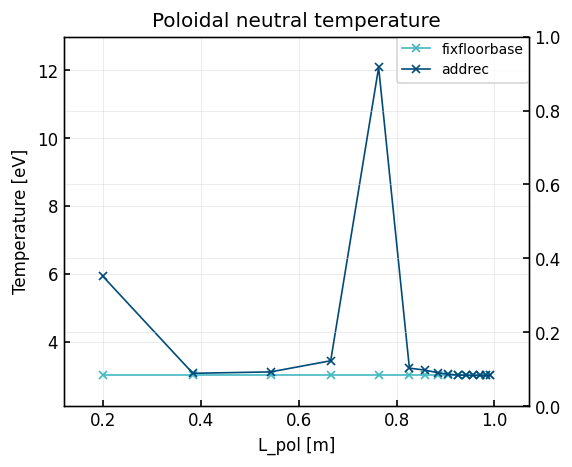

In [3]:

# colors = mpl.cm.get_cmap("plasma", len(cases))(range(len(cases)))
fig, ax = plt.subplots(dpi = 120)

cases = cs.keys()

ax2 = ax.twinx()

# colors = ["teal", "darkorange", "firebrick"]

for i, case in enumerate(cases):
    ds = cs[case].ds.isel(t=-1)
    m = ds.metadata
    fl = ds.isel(x = m["ixseps1"], theta = slice(41,-2))
    dist = np.cumsum(fl["dl"])
    
    if any([x in case for x in ["form2", "form4"]]):
        marker = "x"
    elif any([x in case for x in ["form1", "form3"]]):
        marker = "+"
    else:
        marker = "x"
    ax.plot(dist, fl["Td"], label = case, marker = marker, ms = 5, lw = 1, 
            # color = colors[i]
            )
    
    # try:
    # try:
    #     ax2.plot(dist, fl["Sd+_rec"], label = case, marker = marker, ms = 5, lw = 1)
    # except:
    #     pass
                # color = colors[i])
# ax.plot(dist, fl["Td+"],  marker = "o", ms = 5, lw = 0.5, c = colors[i])
# ax.set_yscale("symlog", linthresh = 1e-3)
ax.set_xlabel("L_pol [m]")
ax.set_ylabel("Temperature [eV]")
ax.set_title("Poloidal neutral temperature")
ax.legend(fontsize="small")
# ax.set_ylim(0,200)

## Field line history

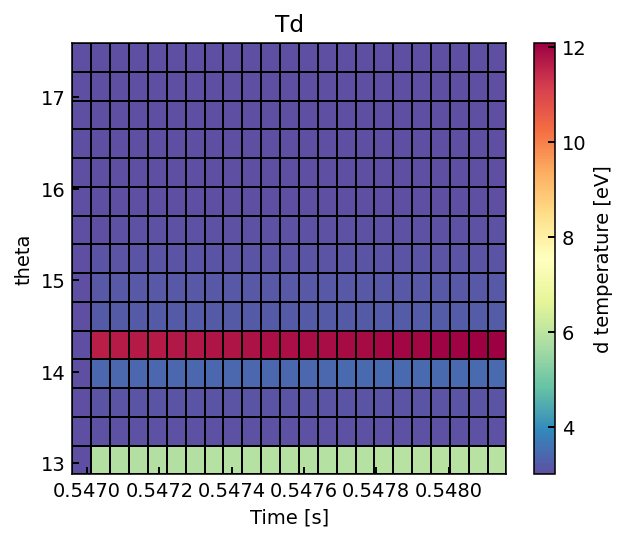

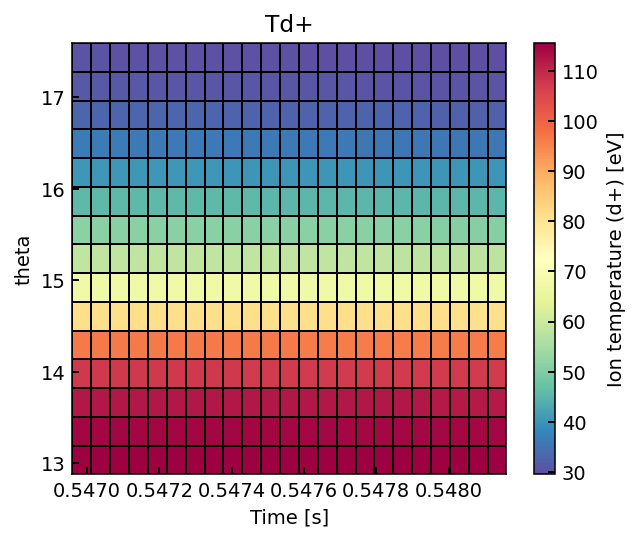

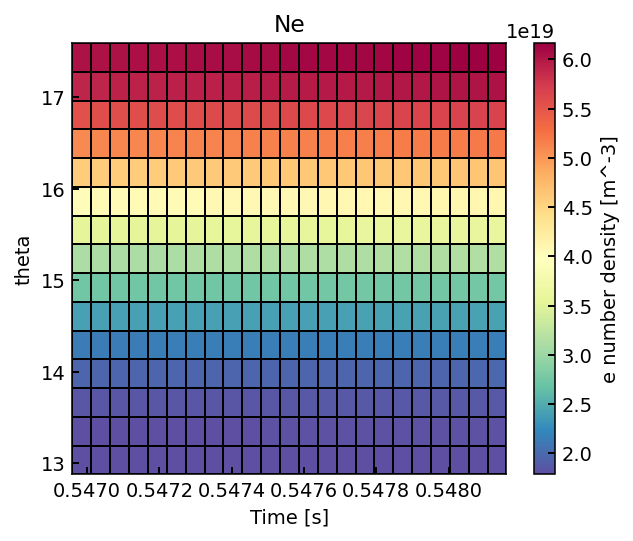

In [4]:
ds = cs["addrec"].ds
m = ds.metadata
fl = ds.isel(x = m["ixseps1"], theta = slice(41,-2))

for param in ["Td", "Td+", "Ne"]:
    fl[param].plot(cmap = "Spectral_r", linewidth = 0.01, color = "k", x = "t")
    plt.grid(False)
    plt.title(param)
    plt.show()

## Core history

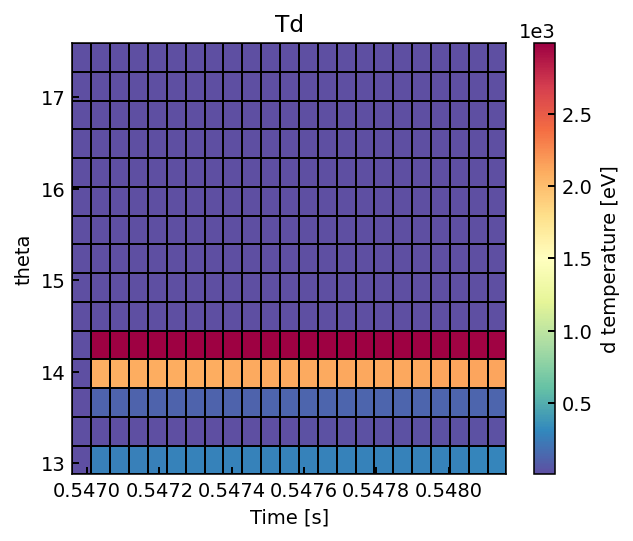

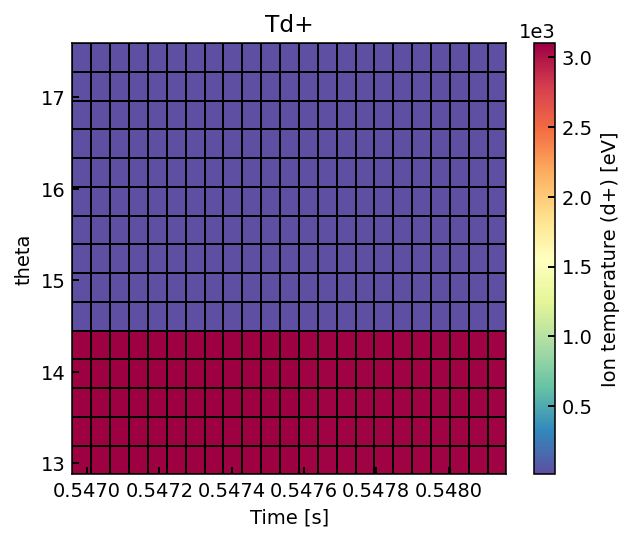

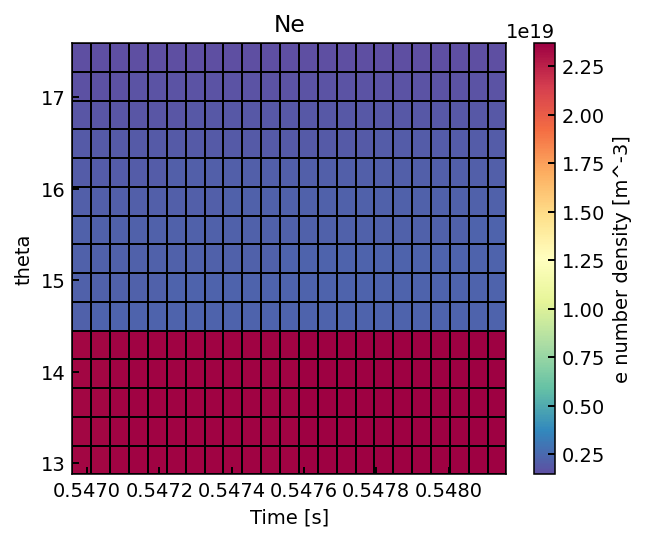

In [5]:
ds = cs["addrec"].ds
m = ds.metadata
fl = ds.isel(x = 2, theta = slice(41,-2))

for param in ["Td", "Td+", "Ne"]:
    fl[param].plot(cmap = "Spectral_r", linewidth = 0.01, color = "k", x = "t")
    plt.grid(False)
    plt.title(param)
    plt.show()

# Lineplot compare

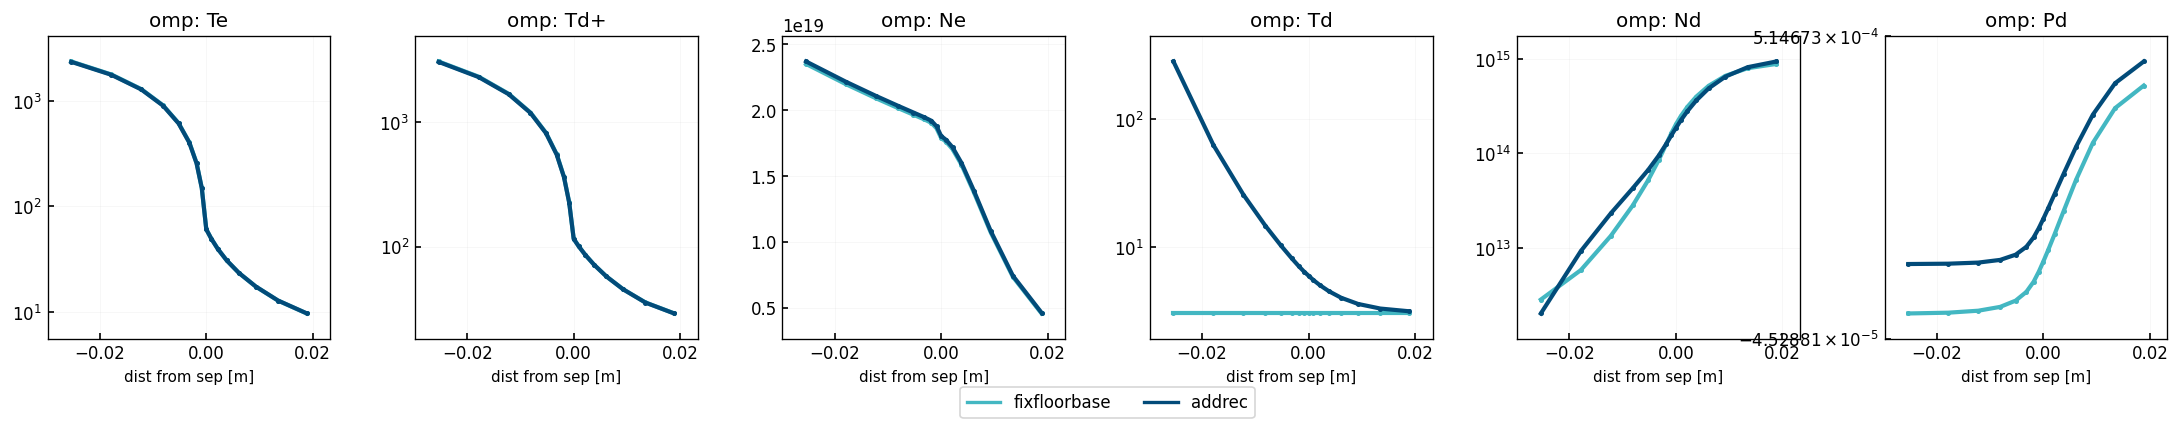

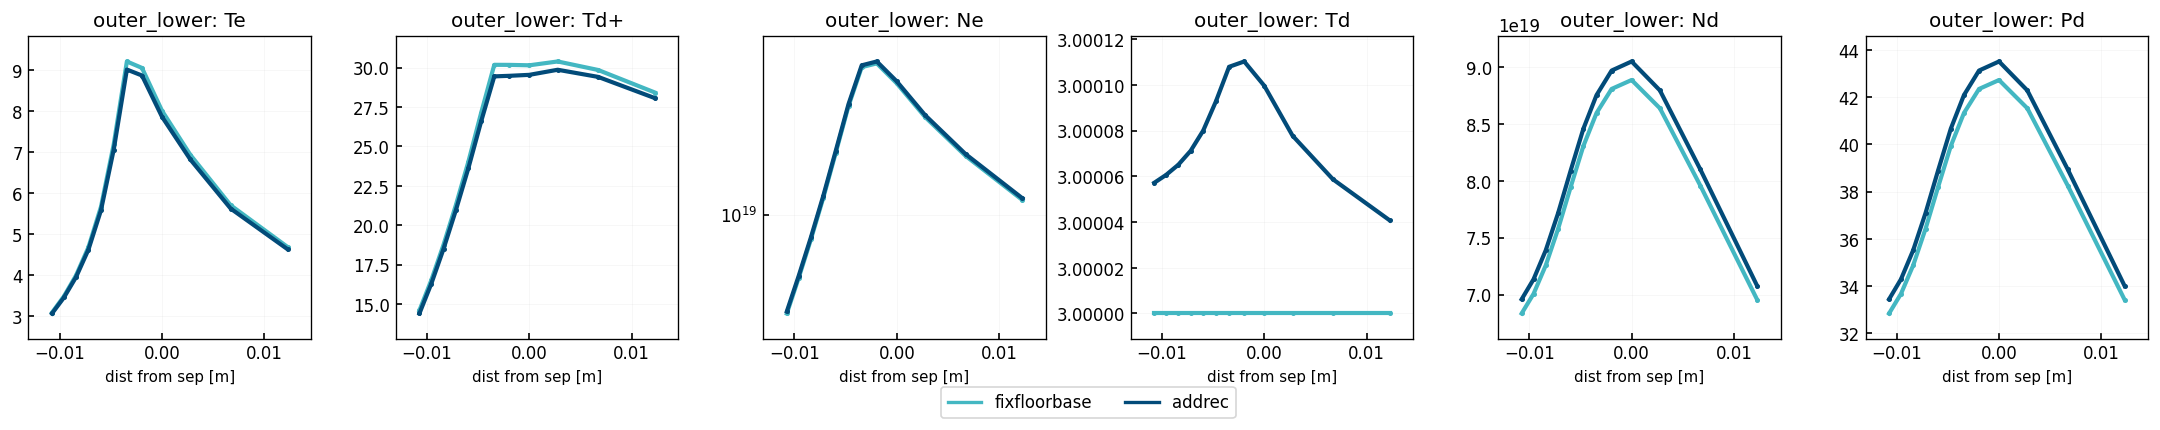

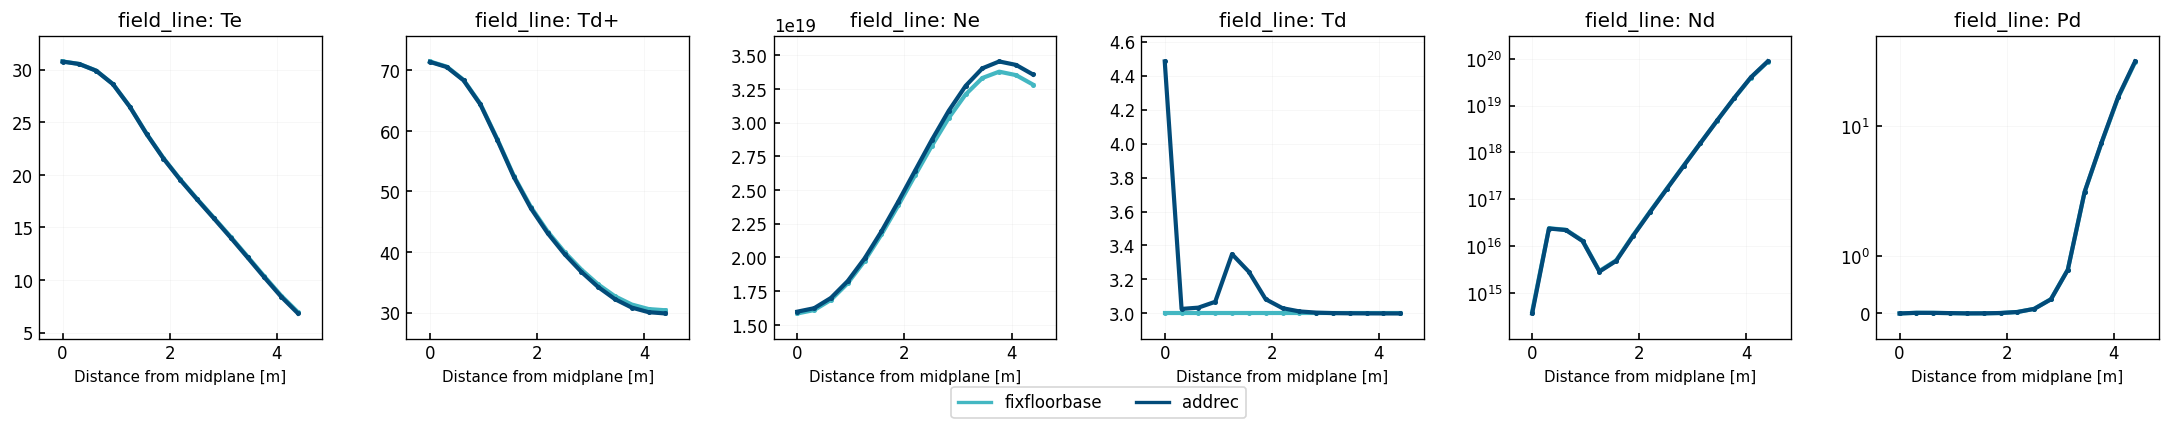

In [6]:
toplot = {}
for case in cs:
    toplot[case] = cs[case].ds.isel(t=-1, x = slice(2,-2))
    
lineplot(
    toplot,
    clean_guards = False,
    logscale = True,
    params = ["Te", "Td+", "Ne", "Td", "Nd", "Pd"],
    regions = ["omp", "outer_lower", "field_line"],
)

# 2D plotting

In [42]:
%matplotlib widget

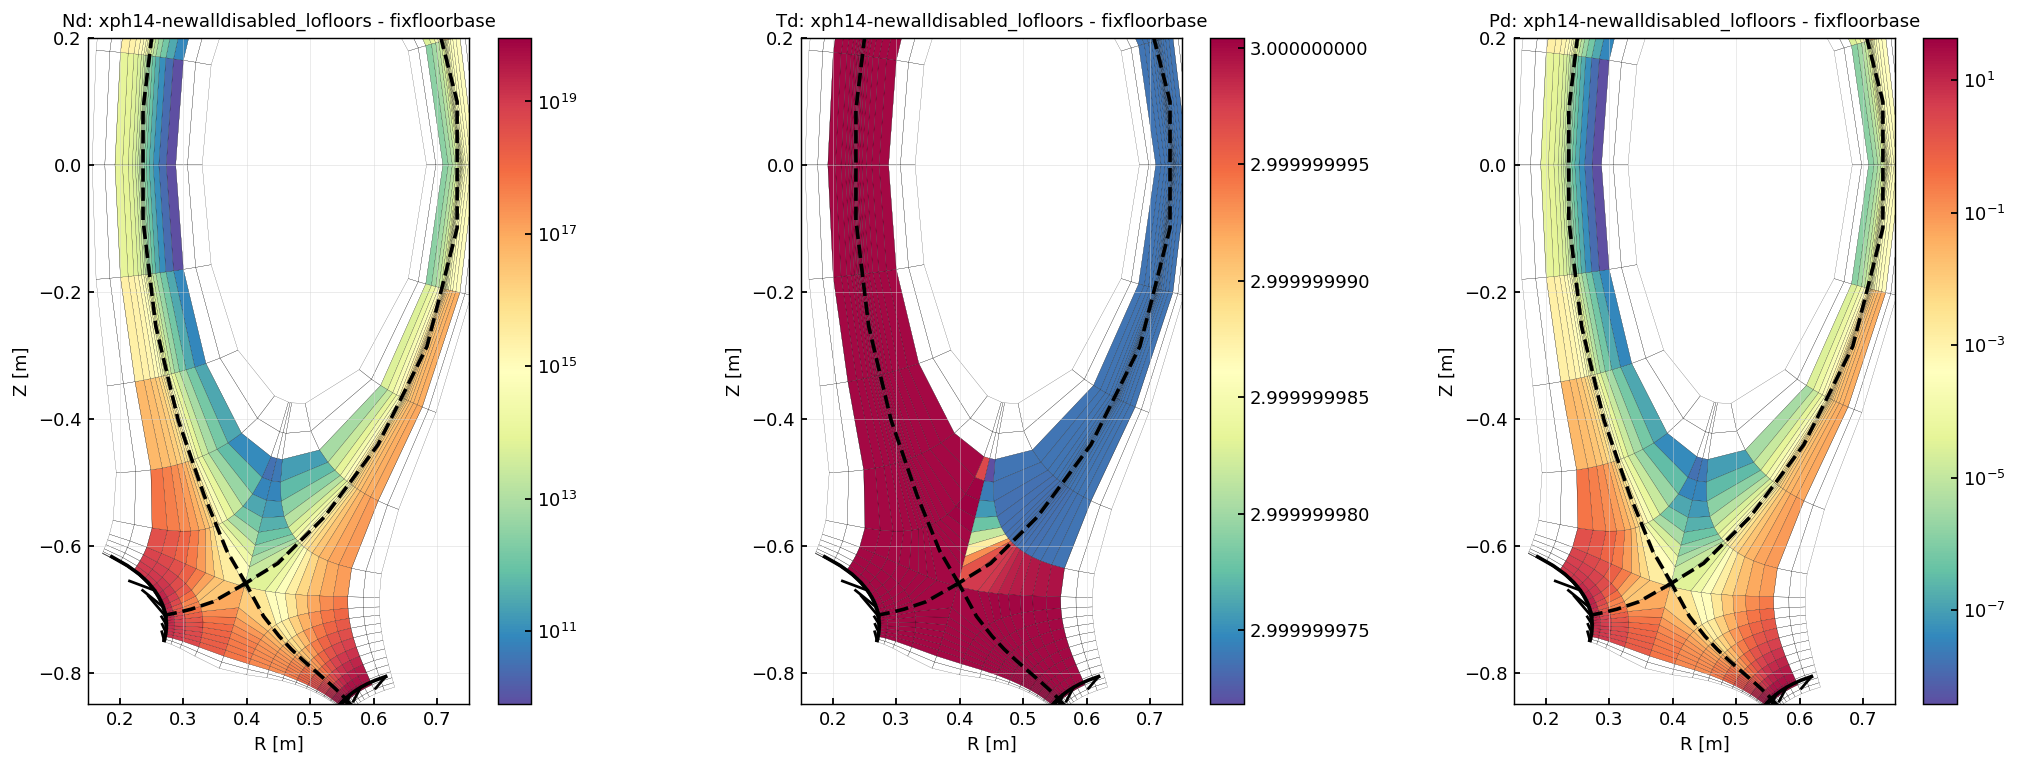

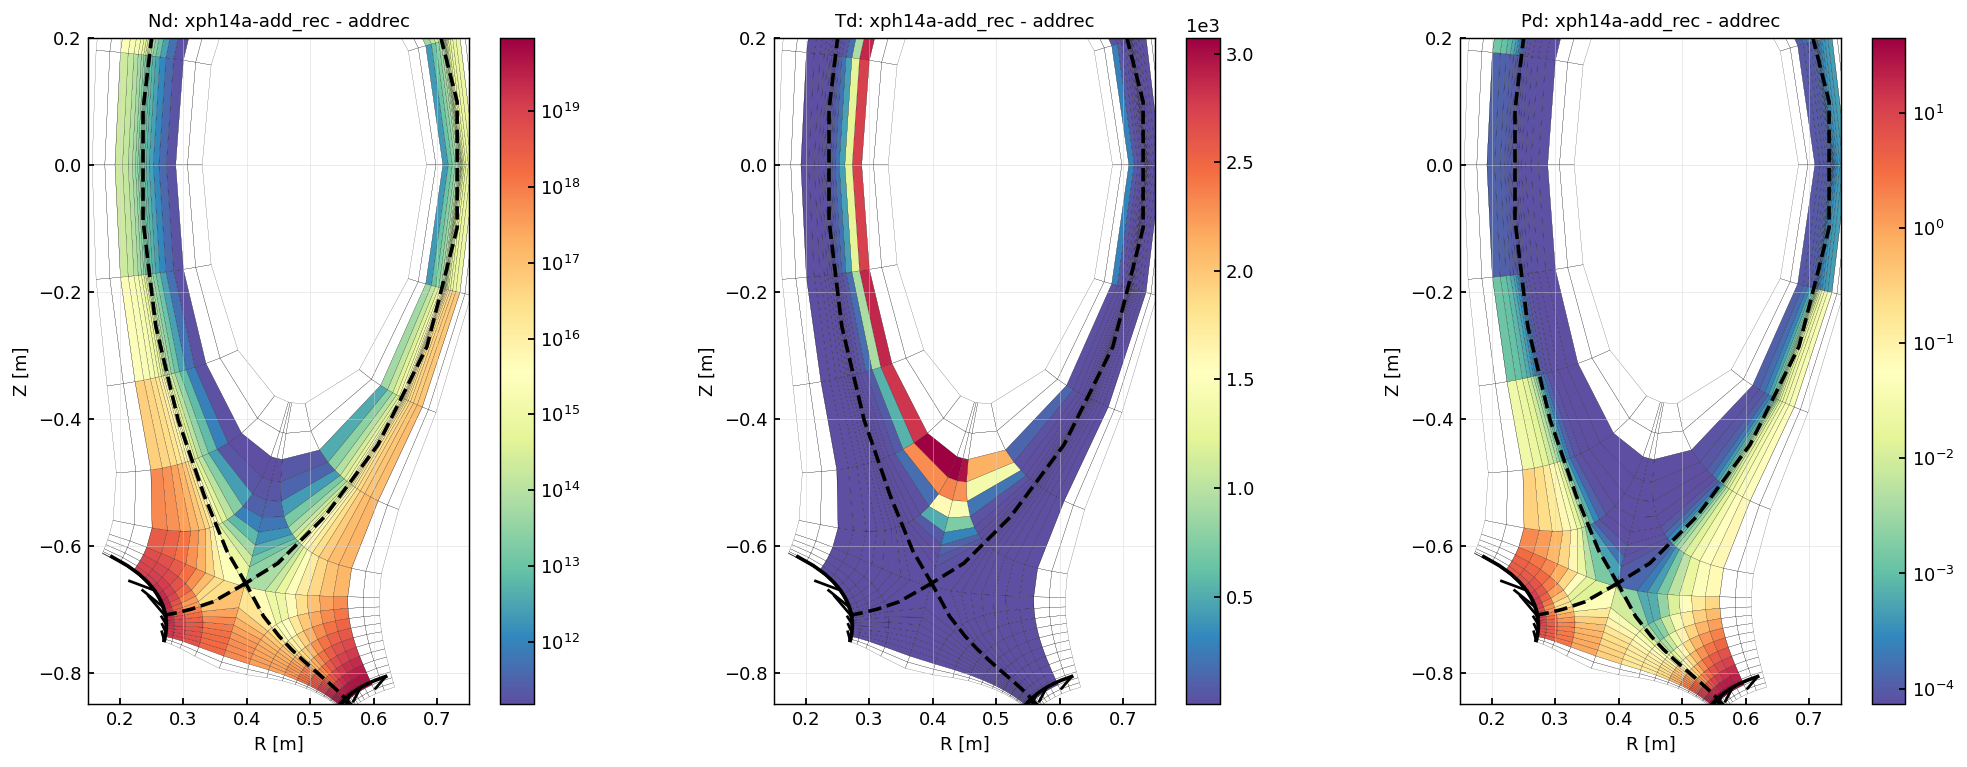

In [34]:
clean_guards = True

for entry in toload:
    case = entry["name"]
    fig, axes = plt.subplots(1,3, figsize = (16,6), dpi = 130)
    newds = cs[case].ds.isel(t=-1)
    
    ax = axes[0]
    data = (newds["Nd"])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = True)
    ax.set_ylim(-0.85, 0.2)
    ax.set_xlim(0.15,0.75)
    ax.set_title(f"Nd: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    
    ax = axes[1]
    data = (newds["Td"])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = False)
    ax.set_ylim(-0.85, 0.2)
    ax.set_xlim(0.15,0.75)
    ax.set_title(f"Td: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    
    ax = axes[2]
    data = (newds["Pd"])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = True)
    ax.set_ylim(-0.85, 0.2)
    ax.set_xlim(0.15,0.75)
    ax.set_title(f"Pd: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    fig.tight_layout()


# Floor check

In [20]:
cs.keys()

dict_keys(['fixfloorbase', 'addrec'])

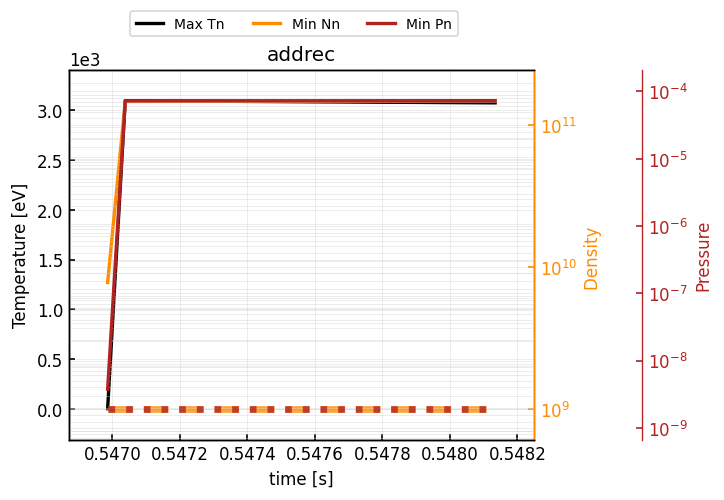

In [22]:

colors = ["teal", "darkorange", "firebrick", "navy", "limegreen", "purple", "skyblue", "red"]
name = "addrec"

# colors = mpl.cm.get_cmap("plasma", len(cases))(range(len(cases)))
fig, ax = plt.subplots(dpi = 120)

ds = cs[name].ds
m = ds.metadata
floors = ds.hermesm.get_floors()

ax.plot(ds["t"], ds["Td"].hermesm.clean_guards().max(["x", "theta"]), label = "Max Tn", marker = "x", ms = 0, lw = 2, color = "k")

# ax.set_yscale("symlog", linthresh = 1e-3)
# ax.set_yscale("log")
ax.set_xlabel("time [s]")
ax.set_ylabel("Temperature [eV]")
ax.set_title(name)

ax2 = ax.twinx()
ax2color = "darkorange"
ax2.plot(ds["t"], ds["Nd"].hermesm.clean_guards().min(["x", "theta"]), label = "Min Nn", c = ax2color, marker = "x", ms = 0, lw = 2)
ax2.set_yscale("log")
# ax2.set_ylim(1e14,3e17)
ax2.set_ylabel("Density ", color = ax2color)
ax2.spines["right"].set_color(ax2color)
ax2.tick_params(axis = "y", colors = ax2color)
ax2.plot(ds["t"], np.ones_like(ds["t"])*floors["nn_floor_si"], c = ax2color, ls = "--", zorder = 100, lw = 4, alpha = 0.8)

ax3 = ax.twinx()
ax3color = "firebrick"
ax3.plot(ds["t"], ds["Pd"].hermesm.clean_guards().min(["x", "theta"]), label = "Min Pn", c = ax3color, marker = "x", ms = 0, lw = 2)
ax3.set_yscale("log")
# ax3.set_ylim(0.0001,10)
ax3.set_ylabel("Pressure", color = ax3color)
ax3.spines["right"].set_color(ax3color)
ax3.spines["right"].set_position(("outward", 65))
ax3.tick_params(axis = "y", colors = ax3color)
ax3.plot(ds["t"], np.ones_like(ds["t"])*floors["pn_floor_si"], c = ax3color, ls = ":", zorder = 100, lw = 4, alpha = 0.8)


fig.legend(loc = "lower center", bbox_to_anchor = (0.5, 0.95), ncols = 4, fontsize="small")
ax.grid(which = "minor", visible = False)
# ax.set_yscale("log")
# ax.set_ylim(10,10000)

# Balances

## Calculate

In [27]:
for name in cs:
    ds = cs[name].ds
    #### PARTICLE FLOW
    ds["pfXlo"] = ds["ParticleFlow_d_xlow"]
    ds["pfXhi"] = ds["pfXlo"].shift(x=-1)
    ds["pfYlo"] = ds["ParticleFlow_d_ylow"]
    ds["pfYhi"] = ds["pfYlo"].shift(theta=-1)

    ds["pfXnet"] = ds["pfXlo"] - ds["pfXhi"]
    ds["pfYnet"] = ds["pfYlo"] - ds["pfYhi"]
    ds["pfNet"] = ds["pfXnet"] + ds["pfYnet"]

    ds["pfSrc"] = ds["Sd+_iz"]*ds["dv"]*-1  + ds["Sd_target_recycle"]*ds["dv"]

    if "Sd+_rec" in ds.data_vars:
        ds["pfSrc"] += ds["Sd+_rec"]*ds["dv"]*-1
    if "Sd_wall_recycle" in ds.data_vars:
        ds["pfSrc"] += ds["Sd_wall_recycle"]*ds["dv"]
    if "Sd_src" in ds.data_vars:
        ds["pfSrc"] += ds["Sd_src"]*ds["dv"]


    ds["pfBal"] = ds["pfSrc"] + ds["pfNet"]

    #### ENERGY FLOW
    ds["efXlo"] = ds["EnergyFlow_d_xlow"] / (3/2) * (5/3)
    ds["efXhi"] = ds["efXlo"].shift(x=-1)
    ds["efYlo"] = ds["EnergyFlow_d_ylow"] / (3/2) * (5/3)
    ds["efYhi"] = ds["efYlo"].shift(theta=-1)

    ds["efXnet"] = ds["efXlo"] - ds["efXhi"]
    ds["efYnet"] = ds["efYlo"] - ds["efYhi"]
    ds["efNet"] = ds["efXnet"] + ds["efYnet"]


    ds["efSrc"] = ds["Ed+_iz"]*ds["dv"]*-1  + ds["Ed_target_recycle"]*ds["dv"]

    if "Ed+_rec" in ds.data_vars:
        ds["efSrc"] += ds["Ed+_rec"]*ds["dv"]*-1
    if "Ed_wall_recycle" in ds.data_vars:
        ds["efSrc"] += ds["Ed_wall_recycle"]*ds["dv"]
    if "Ed_target_refl" in ds.data_vars:
        ds["efSrc"] += ds["Ed_target_refl"]*ds["dv"]
    if "Pd_src" in ds.data_vars:
        ds["efSrc"] += ds["Pd_src"]*ds["dv"] * 3/2

    cs[name].ds = ds
# ds["pfSrc"] = ds["Sd+_iz"]*ds["dv"]*-1  + ds["Sd_target_recycle"]*ds["dv"]

# Check energy imbalance

(-0.85, -0.4)

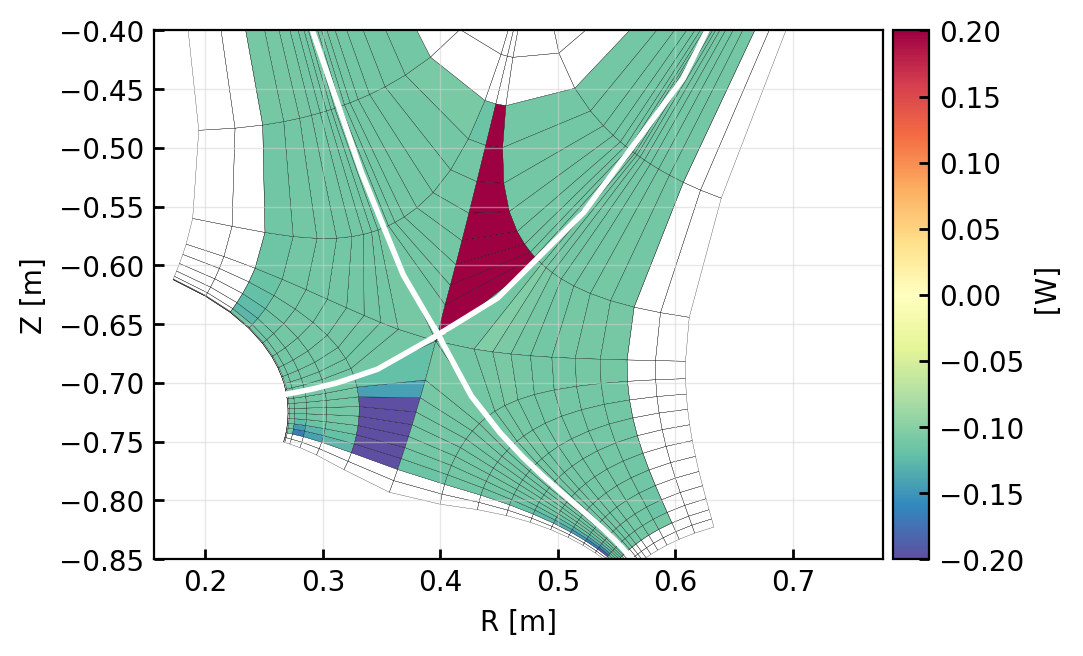

In [17]:
fig, ax = plt.subplots(dpi = 200)

ds = cs["addrec"].ds.isel(t=-1)
bal = (ds["efNet"] + ds["efSrc"]) / ds["efSrc"]

data = bal

data = data.hermesm.clean_guards()
data.bout.polygon(ax, cmap = "Spectral_r", targets = False,
                                    separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 2),
                                    vmax = 0.2, vmin = -0.2, 
                                    antialias = True, linewidth = 0.1, logscale = False)

ax.set_ylim(-0.85, -0.4)

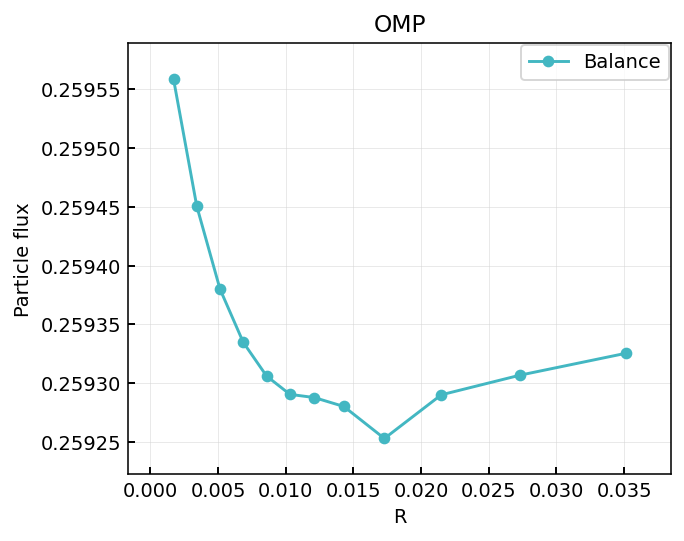

In [28]:
# reg = ds.hermesm.select_custom_sol_ring(11, region = "outer_lower").squeeze().isel(theta = slice(None, None))

ds = cs["base"].ds.isel(t=-1)
reg = ds.hermesm.select_region("outer_lower_target").isel(x = slice(2,-2))
title = "OMP"

bal = (reg["efNet"] + reg["efSrc"]) / reg["efSrc"]

fig, ax = plt.subplots()
x = np.cumsum(reg["dr"]).values
kwargs = dict(marker = "o", ms = 5)

# ax.plot(x, reg["pfXnet"], label = "pfXnet", **kwargs)
# ax.plot(x, reg["pfYnet"], label = "pfYnet", **kwargs)
ax.plot(x, bal, label = "Balance", **kwargs)
# ax.plot(x, reg["Sd+_iz"]*reg["dv"]*-1, label = "iz", **kwargs)



# ax.plot(x, reg["Sd+_rec"]*reg["dv"]*-1, label = "rec", **kwargs)

ax.legend()
ax.set_xlabel("R")
ax.set_ylabel("Particle flux")
ax.set_title(title)
ax.set_yscale("linear")
ax.set_xscale("linear")
# ax.set_xlim(0.8, None)

## 2D plot

fixfloorbase
addrec


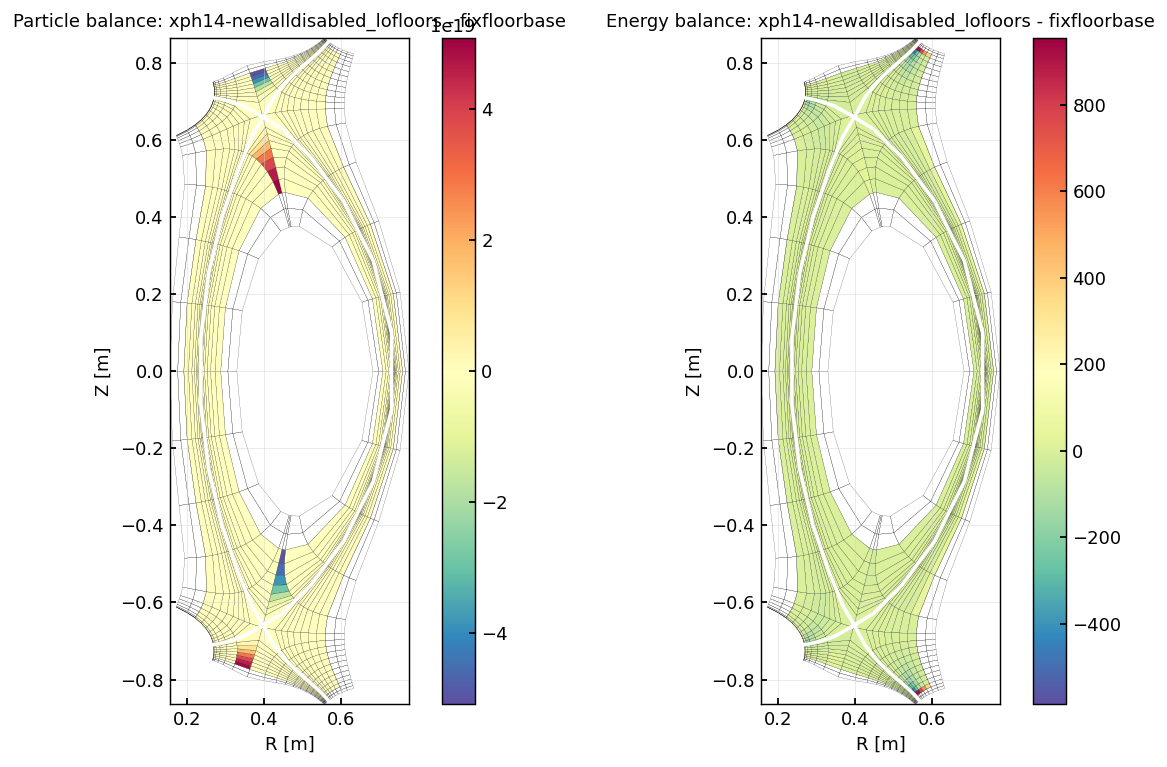

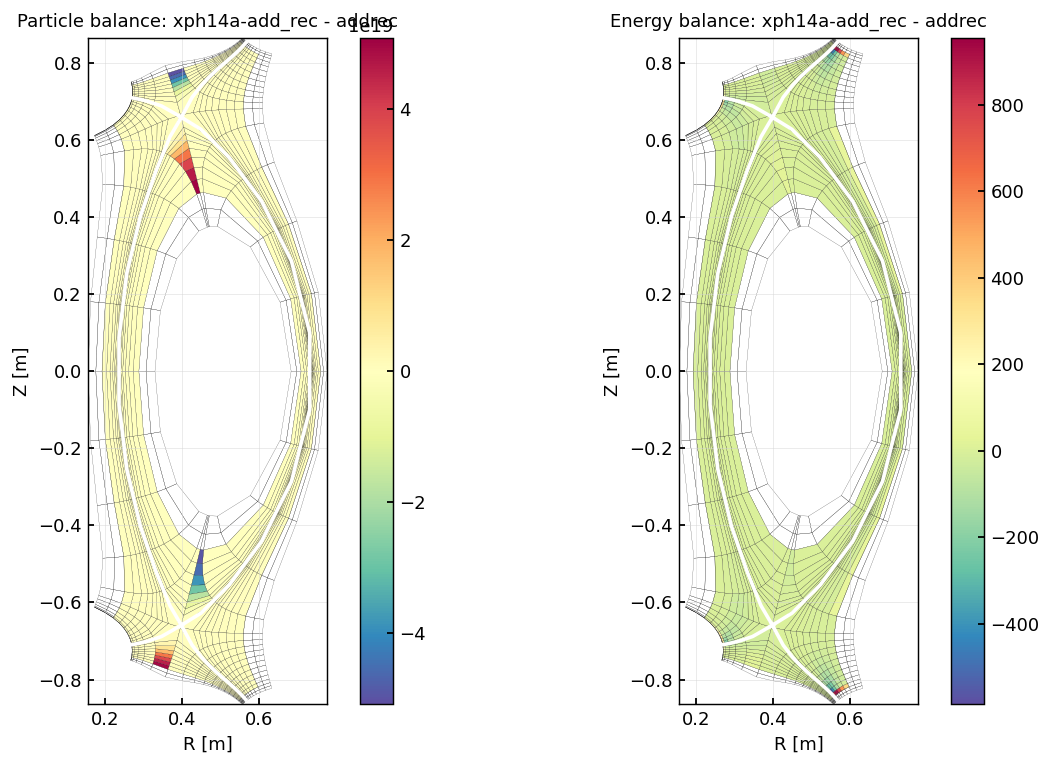

In [8]:
clean_guards = True

for entry in toload:
    case = entry["name"]
    fig, axes = plt.subplots(1,2, figsize = (10,6), dpi = 130)
    print(case)
    newds = cs[case].ds.isel(t=-1)
    
    ax = axes[0]
    # data = (ds["pfNet"] + ds["pfSrc"]) / ds["pfSrc"]
    data = (ds["pfNet"] + ds["pfSrc"])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", targets = False,
                                        separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 2),
                                        # vmax = 1, vmin = -1, 
                                        antialias = True, linewidth = 0.1, logscale = False)

    ax.set_title(f"Particle balance: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    
    ax = axes[1]
    # data = data = (ds["efNet"] + ds["efSrc"]) / ds["efSrc"]
    data = (ds["efNet"] + ds["efSrc"]) 
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", targets = False,
                                        separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 2),
                                        # vmax = 1, vmin = -1, 
                                        antialias = True, linewidth = 0.1, logscale = False)
    
    ax.set_title(f"Energy balance: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    
    fig.tight_layout()
    
    # for ax in axes:
        # ax.set_ylim(-0.85, 0.2)
        # ax.set_xlim(0.15,0.75)


## IMP

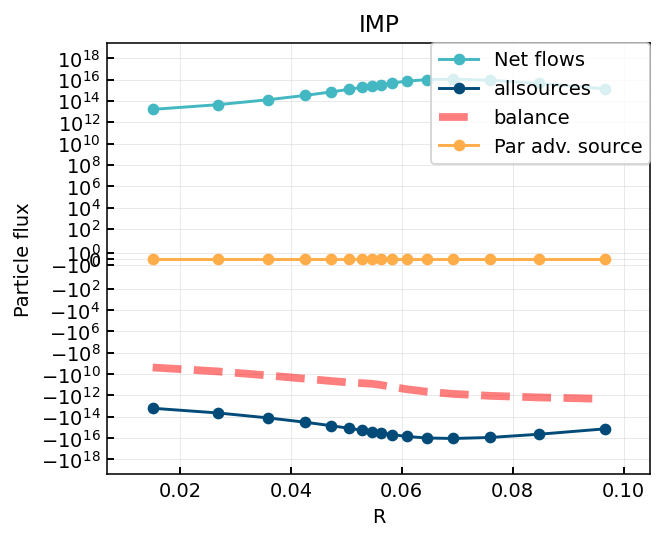

In [34]:
# reg = ds.hermesm.select_custom_sol_ring(11, region = "outer_lower").squeeze().isel(theta = slice(None, None))

ds = cs["fixfloorbase"].ds.isel(t=-1)
reg = ds.hermesm.select_region("inner_midplane_a").isel(x = slice(2,-2))
title = "IMP"

fig, ax = plt.subplots()
x = np.cumsum(reg["dr"]).values
kwargs = dict(marker = "o", ms = 5)

# ax.plot(x, reg["pfXnet"], label = "pfXnet", **kwargs)
# ax.plot(x, reg["pfYnet"], label = "pfYnet", **kwargs)
ax.plot(x, reg["pfNet"], label = "Net flows", **kwargs)
# ax.plot(x, reg["Sd+_iz"]*reg["dv"]*-1, label = "iz", **kwargs)

ax.plot(x, reg["pfSrc"], label = "allsources", **kwargs)
ax.plot(x, (reg["pfNet"] + reg["pfSrc"]), label = "balance", c = "r", ls = "--", lw = 4, alpha = 0.5)
# ax.plot(x, reg["ddt(Nd)"], label = "ddt(Nd)", c = "r", lw = 4, alpha = 0.5)
# ax.plot(x, reg["Sd_perp_adv"]*reg["dv"]*-1, label = "Perp adv. source",  **kwargs)
ax.plot(x, reg["Sd_par_adv"]*reg["dv"], label = "Par adv. source",  **kwargs)

# ax.plot(x, reg["Sd+_rec"]*reg["dv"]*-1, label = "rec", **kwargs)

ax.legend()
ax.set_xlabel("R")
ax.set_ylabel("Particle flux")
ax.set_title(title)
ax.set_yscale("symlog")
ax.set_xscale("linear")
# ax.set_xlim(0.8, None)

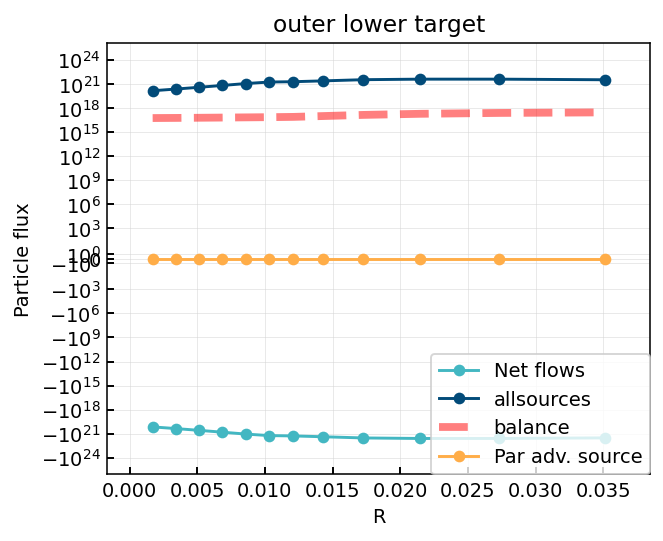

In [11]:
# reg = ds.hermesm.select_custom_sol_ring(11, region = "outer_lower").squeeze().isel(theta = slice(None, None))
reg = ds.hermesm.select_region("outer_lower_target").isel(x = slice(2,-2), t = -1).squeeze()
title = "outer lower target"

fig, ax = plt.subplots()
x = np.cumsum(reg["dr"]).values
kwargs = dict(marker = "o", ms = 5)

# ax.plot(x, reg["pfXnet"], label = "pfXnet", **kwargs)
# ax.plot(x, reg["pfYnet"], label = "pfYnet", **kwargs)
ax.plot(x, reg["pfNet"], label = "Net flows", **kwargs)
# ax.plot(x, reg["Sd+_iz"]*reg["dv"]*-1, label = "iz", **kwargs)

ax.plot(x, reg["pfSrc"], label = "allsources", **kwargs)
ax.plot(x, reg["pfNet"] + reg["pfSrc"], label = "balance", c = "r", ls = "--", lw = 4, alpha = 0.5)
# ax.plot(x, reg["ddt(Nd)"], label = "ddt(Nd)", c = "r", lw = 4, alpha = 0.5)
# ax.plot(x, reg["Sd_perp_adv"]*reg["dv"]*-1, label = "Perp adv. source",  **kwargs)
ax.plot(x, reg["Sd_par_adv"]*reg["dv"], label = "Par adv. source",  **kwargs)

# ax.plot(x, reg["Sd+_rec"]*reg["dv"]*-1, label = "rec", **kwargs)

ax.legend()
ax.set_xlabel("R")
ax.set_ylabel("Particle flux")
ax.set_title(title)
ax.set_yscale("symlog")
ax.set_xscale("linear")
# ax.set_xlim(0.8, None)

## Target

### PF

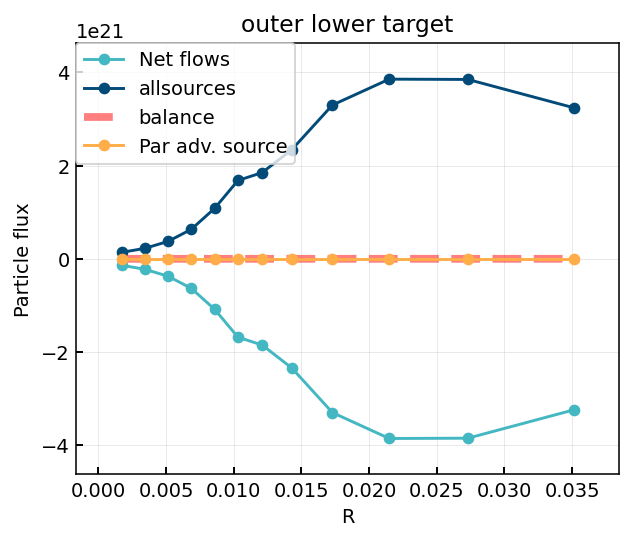

In [49]:
# reg = ds.hermesm.select_custom_sol_ring(11, region = "outer_lower").squeeze().isel(theta = slice(None, None))
reg = ds.hermesm.select_region("outer_lower_target").isel(x = slice(2,-2))
title = "outer lower target"

fig, ax = plt.subplots()
x = np.cumsum(reg["dr"]).values
kwargs = dict(marker = "o", ms = 5)

# ax.plot(x, reg["pfXnet"], label = "pfXnet", **kwargs)
# ax.plot(x, reg["pfYnet"], label = "pfYnet", **kwargs)
ax.plot(x, reg["pfNet"], label = "Net flows", **kwargs)
# ax.plot(x, reg["Sd+_iz"]*reg["dv"]*-1, label = "iz", **kwargs)

ax.plot(x, reg["pfSrc"], label = "allsources", **kwargs)
ax.plot(x, reg["pfNet"] + reg["pfSrc"], label = "balance", c = "r", ls = "--", lw = 4, alpha = 0.5)
# ax.plot(x, reg["ddt(Nd)"], label = "ddt(Nd)", c = "r", lw = 4, alpha = 0.5)
# ax.plot(x, reg["Sd_perp_adv"]*reg["dv"]*-1, label = "Perp adv. source",  **kwargs)
ax.plot(x, reg["Sd_par_adv"]*reg["dv"], label = "Par adv. source",  **kwargs)

# ax.plot(x, reg["Sd+_rec"]*reg["dv"]*-1, label = "rec", **kwargs)

ax.legend()
ax.set_xlabel("R")
ax.set_ylabel("Particle flux")
ax.set_title(title)
# ax.set_yscale("symlog")
ax.set_xscale("linear")
# ax.set_xlim(0.8, None)

### EF

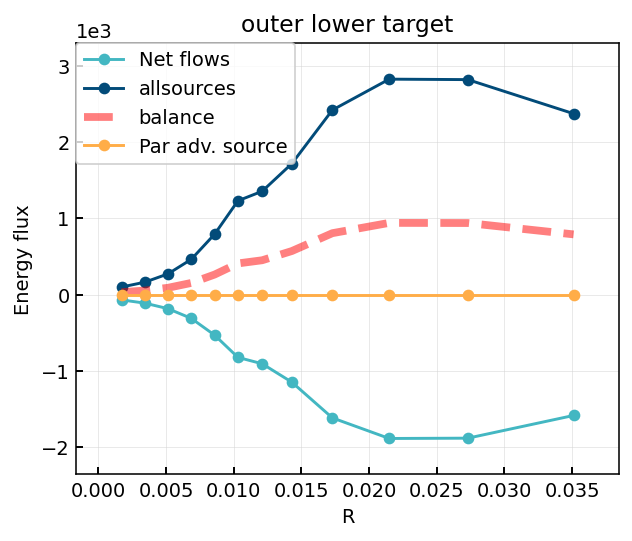

In [13]:
# reg = ds.hermesm.select_custom_sol_ring(11, region = "outer_lower").squeeze().isel(theta = slice(None, None))

if "t" in ds.dims:
    ds = ds.isel(t=-1)
    
reg = ds.hermesm.select_region("outer_lower_target").isel(x = slice(2,-2)).squeeze()
title = "outer lower target"

fig, ax = plt.subplots()
x = np.cumsum(reg["dr"]).values
kwargs = dict(marker = "o", ms = 5)

# ax.plot(x, reg["efXnet"], label = "pfXnet", **kwargs)
# ax.plot(x, reg["efYnet"], label = "pfYnet", **kwargs)
ax.plot(x, reg["efNet"], label = "Net flows", **kwargs)
# ax.plot(x, reg["Sd+_iz"]*reg["dv"]*-1, label = "iz", **kwargs)

ax.plot(x, reg["efSrc"], label = "allsources", **kwargs)
ax.plot(x, reg["efNet"] + reg["efSrc"], label = "balance", c = "r", ls = "--", lw = 4, alpha = 0.5)
# ax.plot(x, reg["ddt(Nd)"], label = "ddt(Nd)", c = "r", lw = 4, alpha = 0.5)
# ax.plot(x, reg["Sd_perp_adv"]*reg["dv"]*-1, label = "Perp adv. source",  **kwargs)
ax.plot(x, reg["Sd_par_adv"]*reg["dv"], label = "Par adv. source",  **kwargs)

# ax.plot(x, reg["Sd+_rec"]*reg["dv"]*-1, label = "rec", **kwargs)

ax.legend()
ax.set_xlabel("R")
ax.set_ylabel("Energy flux")
ax.set_title(title)
# ax.set_yscale("symlog")
ax.set_xscale("linear")
# ax.set_xlim(0.8, None)

## Field line

### PF

(0.4, 1.0059875278358512)

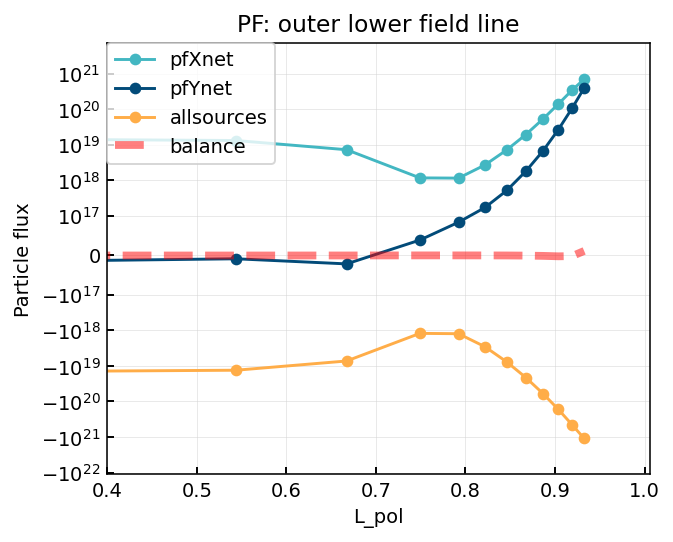

In [21]:
reg = ds.hermesm.select_custom_sol_ring(11, region = "outer_lower").squeeze().isel(theta = slice(None,-2))
title = "PF: outer lower field line"

fig, ax = plt.subplots()
x = np.cumsum(reg["dl"]).values
kwargs = dict(marker = "o", ms = 5)

ax.plot(x, reg["pfXnet"], label = "pfXnet", **kwargs)
ax.plot(x, reg["pfYnet"], label = "pfYnet", **kwargs)
# ax.plot(x, reg["pfNet"], label = "Net flows", **kwargs)
# ax.plot(x, reg["Sd+_iz"]*reg["dv"]*-1, label = "iz", **kwargs)

ax.plot(x, reg["pfSrc"], label = "allsources", **kwargs)
ax.plot(x, reg["pfNet"] + reg["pfSrc"], label = "balance", c = "r", ls = "--", lw = 4, alpha = 0.5)
# ax.plot(x, reg["ddt(Nd)"], label = "ddt(Nd)", c = "r", lw = 4, alpha = 0.5)
# ax.plot(x, reg["Sd_perp_adv"]*reg["dv"]*-1, label = "Perp adv. source",  **kwargs)
# ax.plot(x, reg["Sd_par_adv"]*reg["dv"], label = "Par adv. source",  **kwargs)

# ax.plot(x, reg["Sd+_rec"]*reg["dv"]*-1, label = "rec", **kwargs)

ax.legend()
ax.set_xlabel("L_pol")
ax.set_ylabel("Particle flux")
ax.set_yscale("symlog", linthresh = 1e17)
ax.set_title(title)
ax.set_xlim(0.4, None)

### EF

(0.4, 1.0288331727062188)

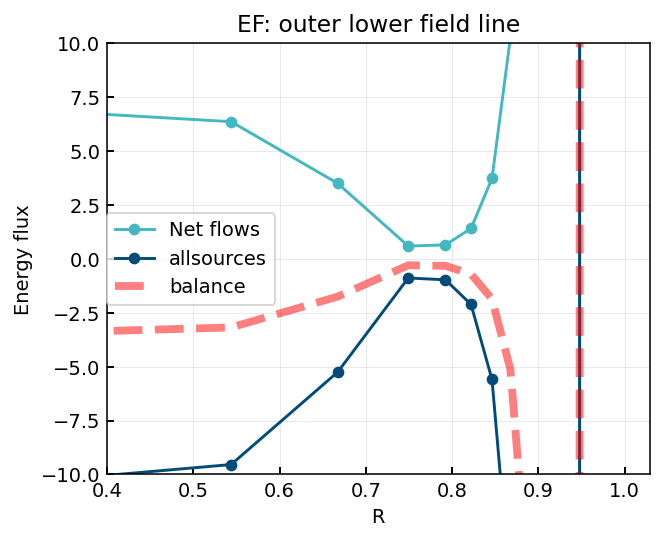

In [6]:
ds = cs["addrec"].ds

if "t" in ds.dims:
    ds = ds.isel(t=-1)

reg = ds.hermesm.select_custom_sol_ring(11, region = "outer_lower").squeeze()
title = "EF: outer lower field line"

fig, ax = plt.subplots()
x = np.cumsum(reg["dl"]).values
kwargs = dict(marker = "o", ms = 5)

# ax.plot(x, reg["pfXnet"], label = "pfXnet", **kwargs)
# ax.plot(x, reg["pfYnet"], label = "pfYnet", **kwargs)
ax.plot(x, reg["efNet"], label = "Net flows", **kwargs)
# ax.plot(x, reg["Sd+_iz"]*reg["dv"]*-1, label = "iz", **kwargs)

ax.plot(x, reg["efSrc"], label = "allsources", **kwargs)


ax.plot(x, reg["efNet"] + reg["efSrc"], label = "balance", c = "r", ls = "--", lw = 4, alpha = 0.5)
# ax.plot(x, reg["ddt(Nd)"], label = "ddt(Nd)", c = "r", lw = 4, alpha = 0.5)
# ax.plot(x, reg["Sd_perp_adv"]*reg["dv"]*-1, label = "Perp adv. source",  **kwargs)
# ax.plot(x, reg["Sd_par_adv"]*reg["dv"], label = "Par adv. source",  **kwargs)

# ax.plot(x, reg["Sd+_rec"]*reg["dv"]*-1, label = "rec", **kwargs)

ax.legend()
ax.set_xlabel("R")
ax.set_ylabel("Energy flux")
# ax.set_yscale("symlog")
ax.set_ylim(-10,10)
ax.set_title(title)
ax.set_xlim(0.4, None)

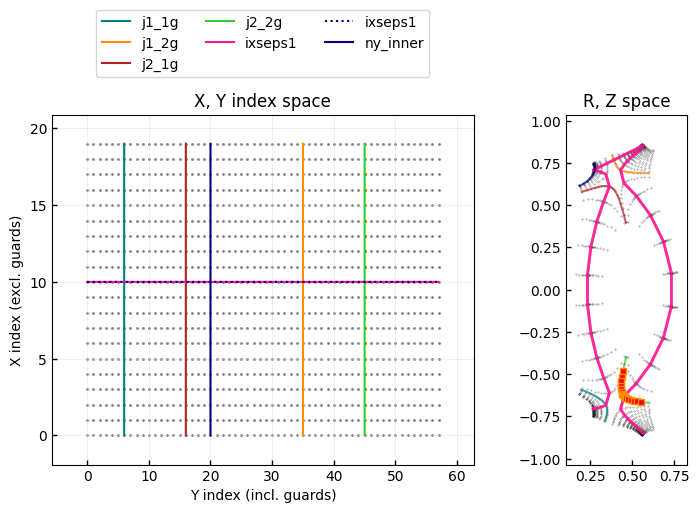

In [84]:
plot_selection(ds, ds.isel(x = slice(2,-2), theta = 45))

# Radial slice

Text(0.5, 1.0, 'EF: radial slice through spike')

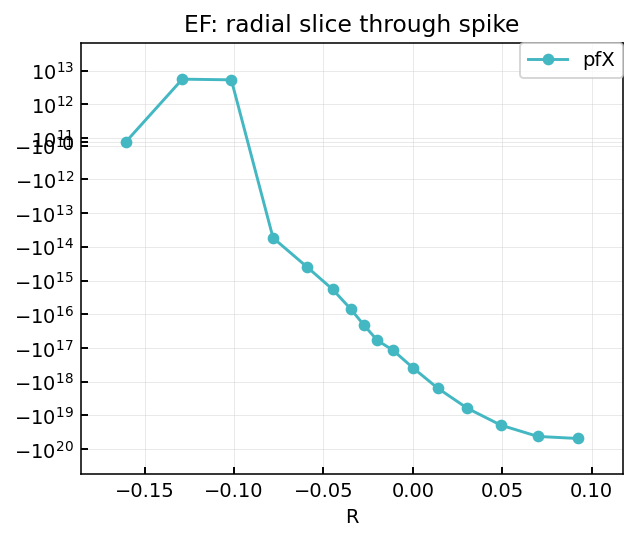

In [91]:
ds = cs["addrec"].ds

if "t" in ds.dims:
    ds = ds.isel(t=-1)

reg = ds.isel(x = slice(2,-2), theta = 45).squeeze()
title = "EF: radial slice through spike"

fig, ax = plt.subplots()
x = np.cumsum(reg["dr"]).values
x = x - x[ds.metadata["ixseps1"]]
kwargs = dict(marker = "o", ms = 5)
ax.plot(x, reg["pfXlo"], label = "pfX", **kwargs)
# ax.plot(x, reg["efXlo"], label = "hfX", **kwargs)
# ax.plot(x, reg["pfXnet"], label = "pfXnet", **kwargs)
# ax.plot(x, reg["pfYnet"], label = "pfYnet", **kwargs)
# ax.plot(x, reg["efNet"], label = "Net flows", **kwargs)
# ax.plot(x, reg["Td"], label = "Neutral temp", **kwargs)
# ax.plot(x, reg["Ed+_rec"], label = "Neutral temp", **kwargs)
# ax.plot(x, reg["efXnet"], label = "efXnet", **kwargs)
# ax.plot(x, reg["efYnet"], label = "Net flows in Y", **kwargs)
# ax.plot(x, np.gradient(reg["Pd"],x), label = "Neutral pressure", **kwargs)
# ax.plot(x, reg["Sd+_iz"]*reg["dv"]*-1, label = "iz", **kwargs)

# ax.plot(x, reg["efSrc"], label = "allsources", **kwargs)


# ax.plot(x, reg["efNet"] + reg["efSrc"], label = "balance", c = "r", ls = "--", lw = 4, alpha = 0.5)
# ax.plot(x, reg["ddt(Nd)"], label = "ddt(Nd)", c = "r", lw = 4, alpha = 0.5)
# ax.plot(x, reg["Sd_perp_adv"]*reg["dv"]*-1, label = "Perp adv. source",  **kwargs)
# ax.plot(x, reg["Sd_par_adv"]*reg["dv"], label = "Par adv. source",  **kwargs)

# ax.plot(x, reg["Sd+_rec"]*reg["dv"]*-1, label = "rec", **kwargs)

ax.legend()
ax.set_xlabel("R")
# ax.set_ylabel("Energy flux")
# ax.set_ylabel("Particle flux")
# ax.set_yscale("symlog", linthresh = 1e-4)
ax.set_yscale("symlog", linthresh = 1e12)
# ax.set_yscale("log")
# ax.set_ylim(-10,10)
ax.set_title(title)
# ax.set_xlim(0.4, None)

In [50]:
reg["efXnet"].values

array([-2.67399193e-03,  7.24608955e-04,  8.26511654e-03,  1.23350935e-02,
        1.27192309e-02,  1.58945851e-02,  2.54057466e-02,  4.35536003e-02,
        2.16238917e-02,  1.30290335e-01,  5.69146473e-01,  2.20475645e+00,
        6.41075711e+00,  1.08531998e+01,  2.98165337e+00, -2.32876514e+01])

Text(0.5, 0, 'L_pol')

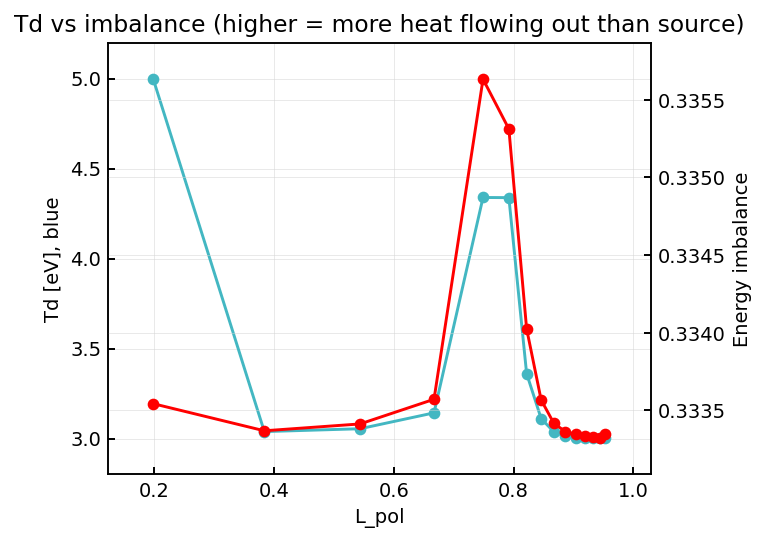

In [27]:
fig, ax = plt.subplots()
x = np.cumsum(reg["dl"]).values
kwargs = dict(marker = "o", ms = 5)

bal = (reg["efNet"] + reg["efSrc"]) / reg["efSrc"]

ax.plot(x, reg["Td"], label = "Td", **kwargs)
ax2 = ax.twinx()
ax2.plot(x, bal, c = "r", **kwargs)
ax.set_ylabel("Td [eV], blue")
ax2.set_ylabel("Energy imbalance")
ax.set_title("Td vs imbalance (higher = more heat flowing out than source)")
ax.set_xlabel("L_pol")

# Investigate recombination

In [3]:
ds = cs["addrec"].ds.isel(t=-1)

Text(0.5, 1.0, 'Ed+_iz + Ed+_rec + Rd+_rec')

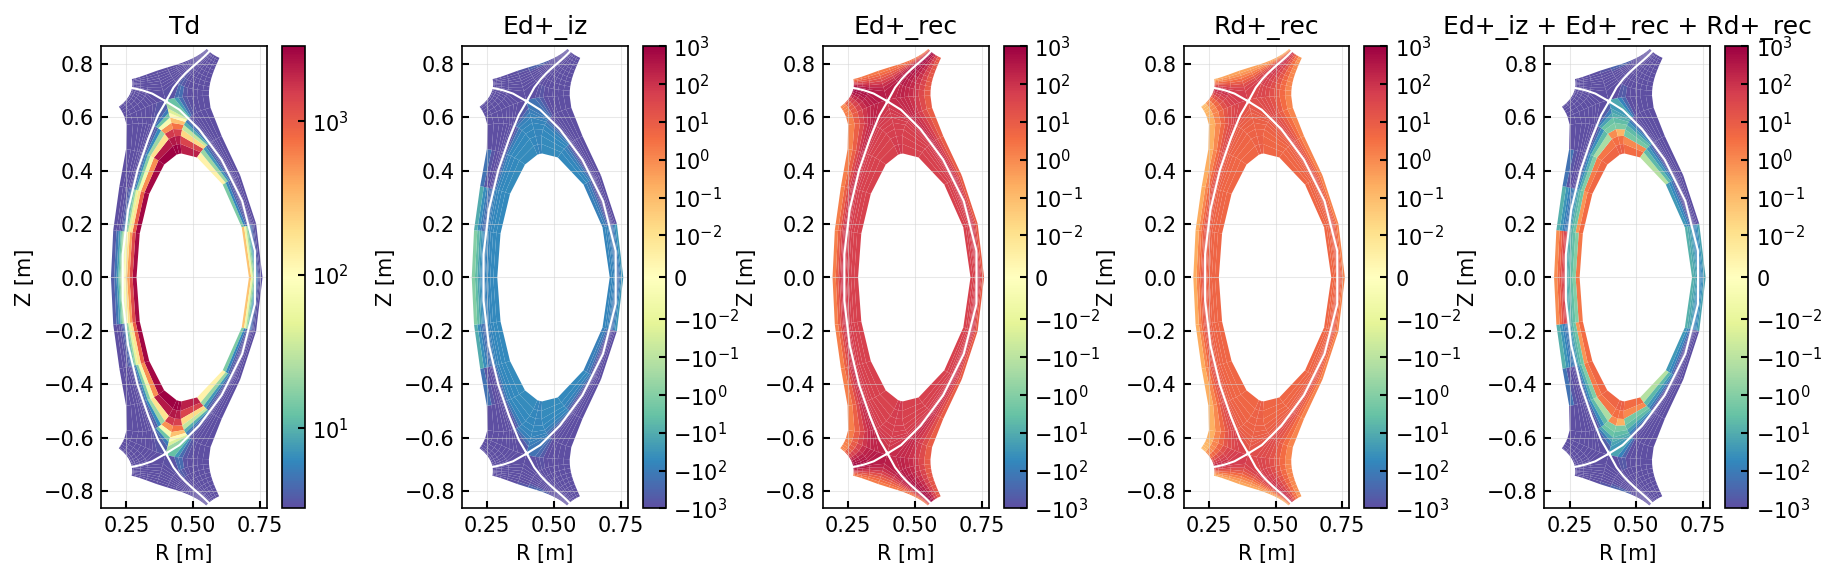

In [24]:
# dSrcTot = ds["Ed_wall_refl"] + ds["Edd*_wall_refl"] + ds["Edd+_cxt"] + ds["Edd+_iz"]*-1 + ds["Ed+_rec"] * -1
dSrcTot = ds["Ed+_iz"]*-1 + ds["Ed+_rec"] * -1
sepkwargs = dict(color = "white", linestyle = "solid", linewidth = 1)

fig, axes = plt.subplots(1,5, dpi = 150, figsize = (15,4))

lim = 1e3
vmin = -lim
vmax = lim

(ds["Td"]).hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "Spectral_r", antialias = True, 
                                                            vmin = None, vmax = None, 
                                                            logscale = True, 
                                                            separatrix_kwargs = sepkwargs, targets = False)

(ds["Ed+_iz"] * -1).hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "Spectral_r", antialias = True, 
                                                            vmin = vmin, vmax = vmax, 
                                                            logscale = True, 
                                                            separatrix_kwargs = sepkwargs, targets = False)

(ds["Ed+_rec"] * -1).hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "Spectral_r", antialias = True, 
                                                            vmin = vmin, vmax = vmax, 
                                                            logscale = True, 
                                                            separatrix_kwargs = sepkwargs, targets = False)

(ds["Rd+_rec"] * -1).hermesm.clean_guards().bout.polygon(ax = axes[3], cmap = "Spectral_r", antialias = True, 
                                                            vmin = vmin, vmax = vmax, 
                                                            logscale = True, 
                                                            separatrix_kwargs = sepkwargs, targets = False)

(ds["Ed+_iz"]*-1 + ds["Ed+_rec"] * -1 + ds["Rd+_rec"] * -1).hermesm.clean_guards().bout.polygon(ax = axes[4], cmap = "Spectral_r", antialias = True, 
                                                            vmin = vmin, vmax = vmax, 
                                                            logscale = True, 
                                                            separatrix_kwargs = sepkwargs, targets = False)

axes[4].set_title("Ed+_iz + Ed+_rec + Rd+_rec")

Text(0.5, 1.0, 'Net IZ/REC heat')

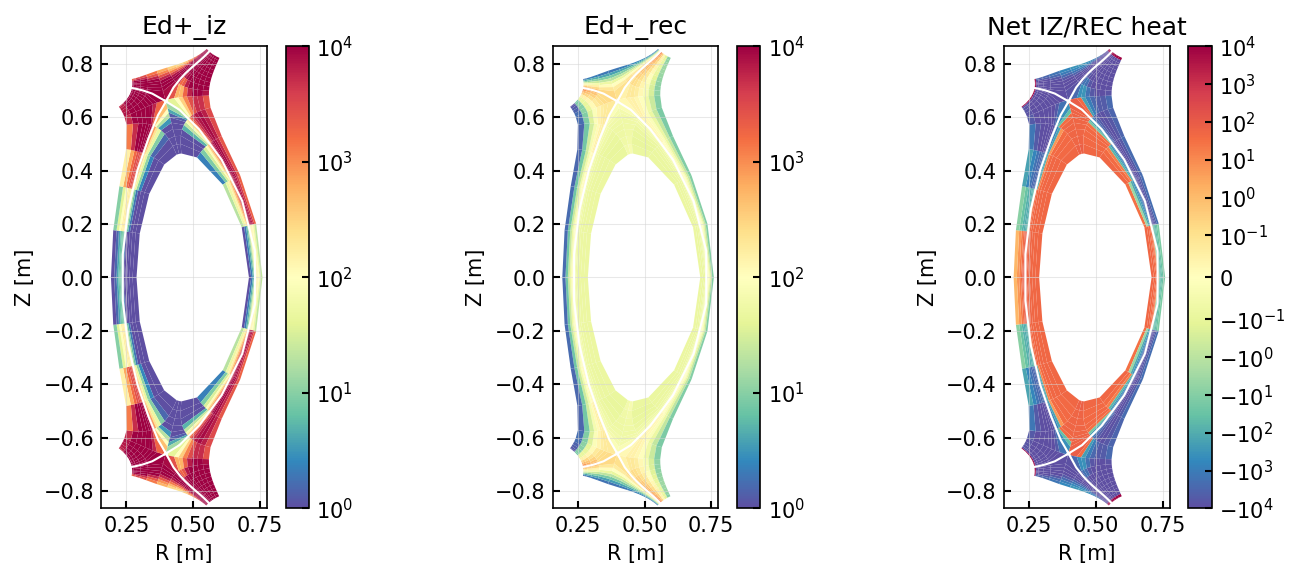

In [22]:

dSrcTot = ds["Ed_target_refl"] + ds["Ed_target_recycle"] + ds["Ed+_iz"]*-1 + ds["Ed+_rec"] * -1
# dSrcTot = ds["Ed+_iz"]*-1 + ds["Ed+_rec"] * -1

fig, axes = plt.subplots(1,3, dpi = 150, figsize = (11,4))
sepkwargs = dict(linewidth = 1, color = "white", linestyle = "-")

(ds["Ed+_iz"]).hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "Spectral_r", antialias = True, 
                                                            vmin = 1, vmax = 1e4, 
                                                            logscale = True, 
                                                            separatrix_kwargs = sepkwargs, targets = False)

(ds["Ed+_rec"] * -1).hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "Spectral_r", antialias = True, 
                                                            vmin = 1, vmax = 1e4, 
                                                            logscale = True, 
                                                            separatrix_kwargs = sepkwargs, targets = False)

(dSrcTot).hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "Spectral_r", antialias = True, 
                                                            vmin = -10000, vmax = 10000, 
                                                            logscale = True, 
                                                            separatrix_kwargs = sepkwargs, targets = False)

axes[2].set_title("Net IZ/REC heat")

## Radial slice above X-point

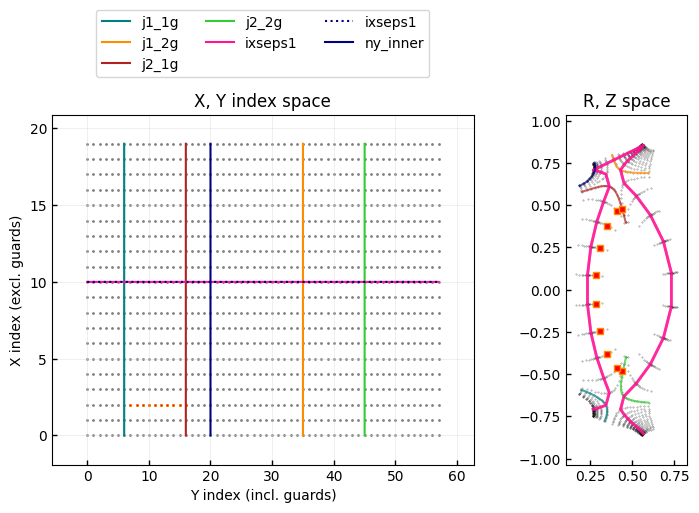

In [6]:
plot_selection(ds, ds.hermesm.select_region("inner_core_edge"))

## Core edge

In [4]:
cs.keys()

dict_keys(['fixfloorbase', 'cellaverage_upwind'])

In [5]:
ds = cs["fixfloorbase"].ds.isel(t=-1)
# ds = cs["cellaverage_upwind"].ds.isel(t=-1)

*****************************
Excel saves precision as it appears, not as what the number has.......
*****************************


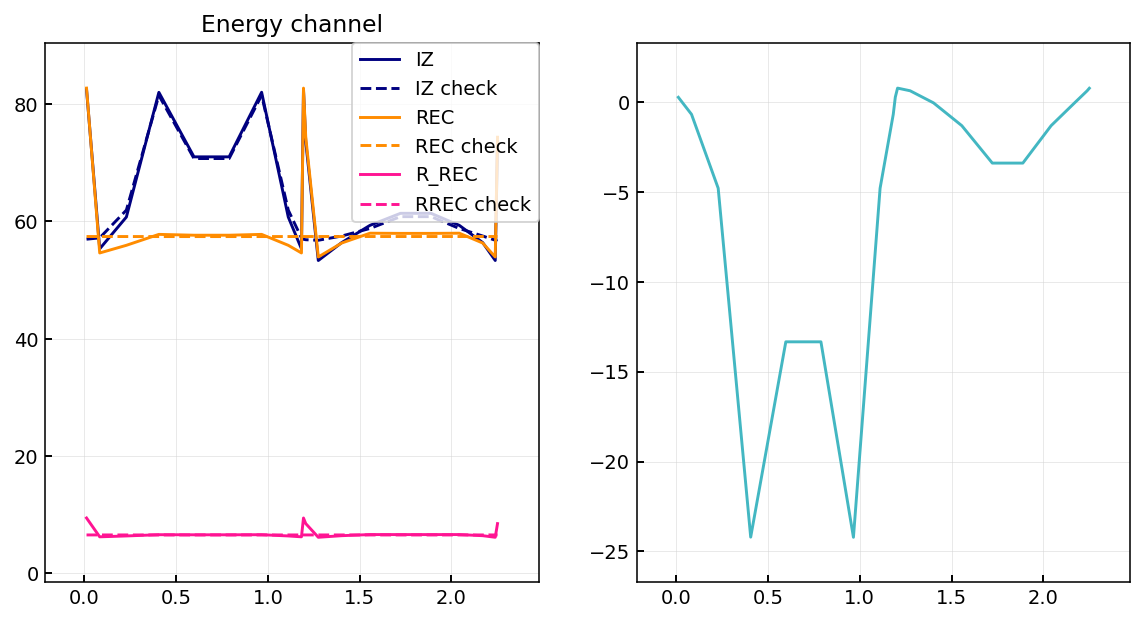

In [6]:
from general.rates import AMJUEL_rates
from sd1d.analysis import AMJUEL

reg = ds.hermesm.select_region("core_edge").squeeze()

Te = reg["Te"].values
Ne = reg["Ne"].values

amj = AMJUEL()
Krec = amj.amjuel_2d("rec", Te, Ne, data = AMJUEL_rates("rec"))
Kiz = amj.amjuel_2d("rec", Te, Ne, data = AMJUEL_rates("iz"))
Rrec = amj.amjuel_2d("rec", Te, Ne, data = AMJUEL_rates("Rrec"))

fig, axes = plt.subplots(1,2, figsize = (10,5))

x = reg["dl"].cumsum()

ax = axes[0]
ax.set_title("Energy channel")
# ax.set_yscale("log")
ax.plot(x, reg["Ed+_iz"], c = "navy", label = "IZ")
ax.plot(x, Kiz * reg["Ne"] * reg["Nd"] * reg["Td"] * (3/2) * constants("q_e"), c = "navy", ls = "--", label = "IZ check")
ax.plot(x, reg["Ed+_rec"]*-1, c = "darkorange", label = "REC")
ax.plot(x, Krec * reg["Ne"]**2 * reg["Td+"] * (3/2) * constants("q_e"), c = "darkorange", ls = "--", label = "REC check")
# ax.plot(x, reg["Rd+_rec"]*-1 - reg["Sd+_rec"]*13.6*constants("q_e"), c = "deeppink", label = "R_REC")
# ax.plot(x, Rrec * reg["Ne"]**2 * constants("q_e"), c = "deeppink", ls = "--", label = "RREC check")
ax.legend()
# ax2 = ax.twinx()
# ax2.plot(x, reg["Td"], alpha = 0.2, lw = 3, c = "red")

ax = axes[1]
# ax.set_title
# ax.plot(x, reg["Ed+_iz"]*-1 + reg["Ed+_rec"]*-1 + reg["Rd+_rec"]*-1)
ax.plot(x, reg["Ed+_iz"]*-1 + reg["Ed+_rec"]*-1)